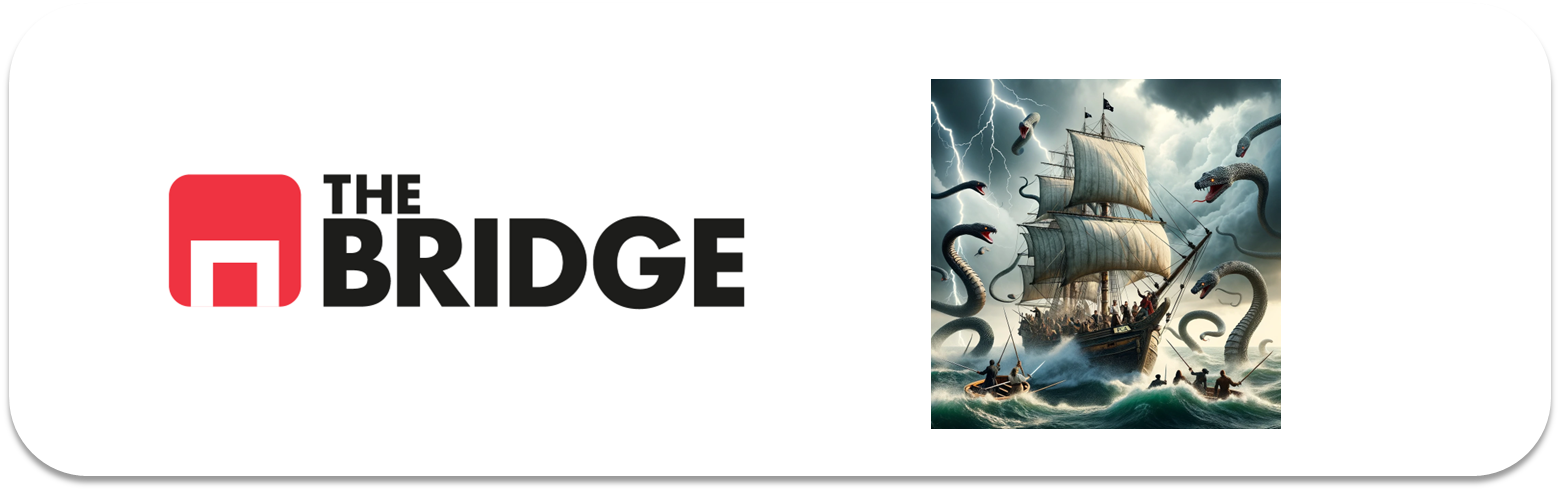

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import Toolbox_ML as tlb
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, recall_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
tlb.describe_df(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Tipos,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,2,10314,78,10,11472,4167,43,13,16,8,10
% Cardinalidad,0.02,87.29,0.66,0.08,97.09,35.27,0.36,0.11,0.14,0.07,0.08


In [6]:
tlb.tipifica_variables(df, 5,10)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Continua
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
4,DebtRatio,Numérica Continua
5,MonthlyIncome,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Numérica Discreta
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Numérica Discreta


In [7]:
target = "SeriousDlqin2yrs"

In [8]:
df[target].value_counts(True)

SeriousDlqin2yrs
0    0.929756
1    0.070244
Name: proportion, dtype: float64

In [9]:
train_set, test_set = train_test_split(df, stratify=df[target], test_size = 0.2, random_state= 42)

(10, 2)


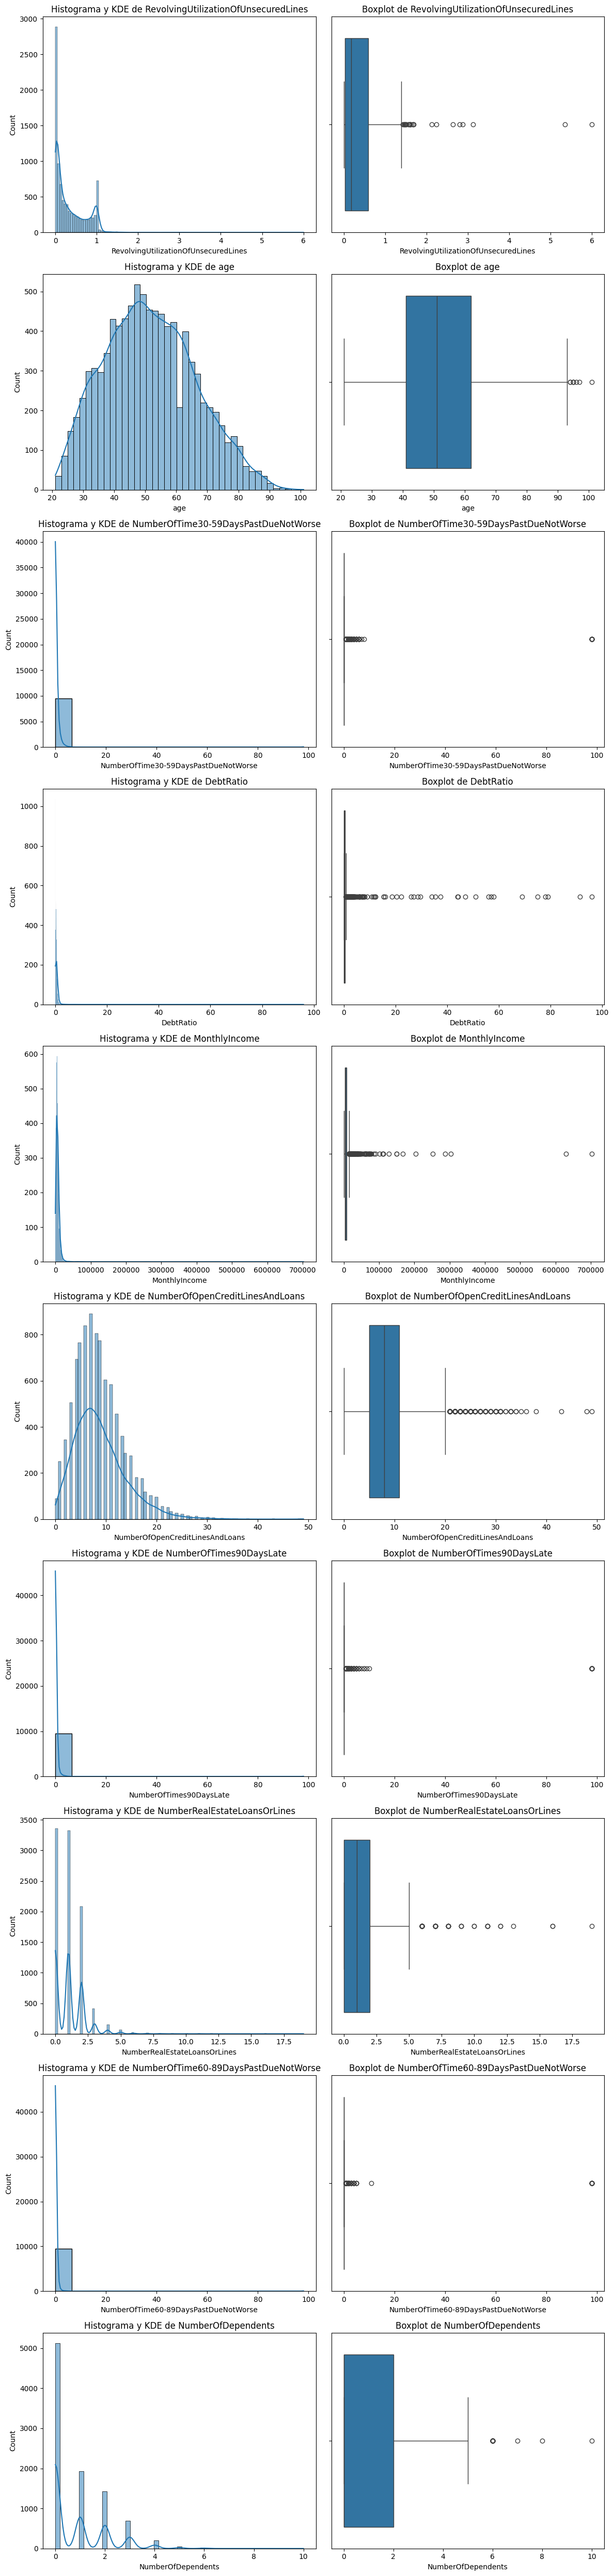

In [10]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != target])

In [11]:
feat_num = ["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio","MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", 'NumberRealEstateLoansOrLines', "NumberOfDependents"]
feat_dis = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

In [12]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.829454
1     0.114896
2     0.034596
3     0.011109
4     0.005396
5     0.001799
6     0.001481
98    0.001058
7     0.000106
8     0.000106
Name: proportion, dtype: float64

In [13]:
col = "NumberOfTime30-59DaysPastDueNotWorse"
new_col = "N30-59DPD"
bins = [-1, 0, 1, 98]
labels = [0, 1, 2]
train_set[new_col] = pd.cut(train_set[col], bins=bins, labels=labels)
test_set[new_col] = pd.cut(test_set[col], bins=bins, labels=labels)
train_set[new_col].value_counts(True)

N30-59DPD
0    0.829454
1    0.114896
2    0.055650
Name: proportion, dtype: float64

In [14]:
train_set["NumberOfTimes90DaysLate"].value_counts(True)

NumberOfTimes90DaysLate
0     0.944985
1     0.033432
2     0.011955
3     0.004338
4     0.002433
98    0.001058
5     0.000846
6     0.000423
8     0.000212
10    0.000106
9     0.000106
7     0.000106
Name: proportion, dtype: float64

In [15]:
col = "NumberOfTimes90DaysLate"
new_col = "N90DL"
bins = [-1, 0, 98]
labels = [0, 1]
train_set[new_col] = pd.cut(train_set[col], bins=bins, labels=labels)
test_set[new_col] = pd.cut(test_set[col], bins=bins, labels=labels)
train_set[new_col].value_counts(True)

N90DL
0    0.944985
1    0.055015
Name: proportion, dtype: float64

In [16]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0     0.948688
1     0.040203
2     0.006771
3     0.001587
4     0.001164
98    0.001058
5     0.000423
11    0.000106
Name: proportion, dtype: float64

In [17]:
col = "NumberOfTime60-89DaysPastDueNotWorse"
new_col = "N60-80DPD"
bins = [-1, 0, 98]
labels = [0, 1]
train_set[new_col] = pd.cut(train_set[col], bins=bins, labels=labels)
test_set[new_col] = pd.cut(test_set[col], bins=bins, labels=labels)
train_set[new_col].value_counts(True)

N60-80DPD
0    0.948688
1    0.051312
Name: proportion, dtype: float64

In [18]:
feat_cat = ["N30-59DPD", "N90DL","N60-80DPD"]

ANALISIS VISUAL

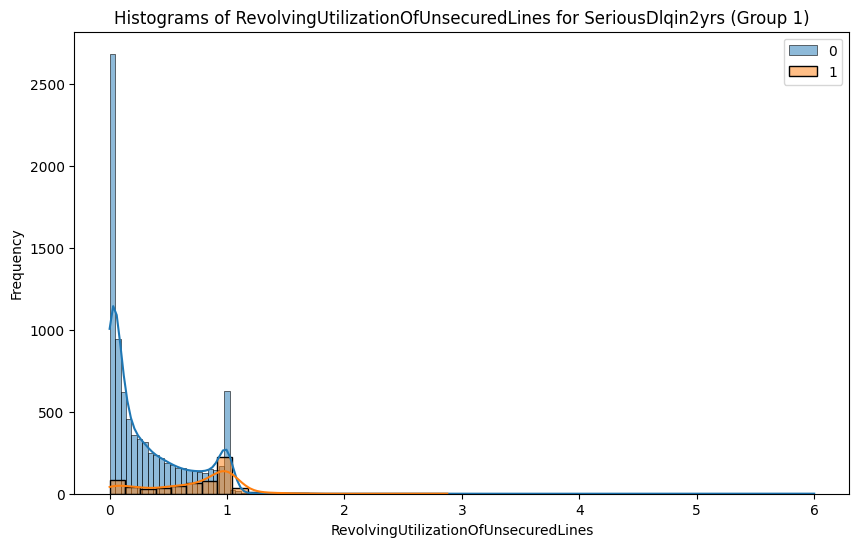

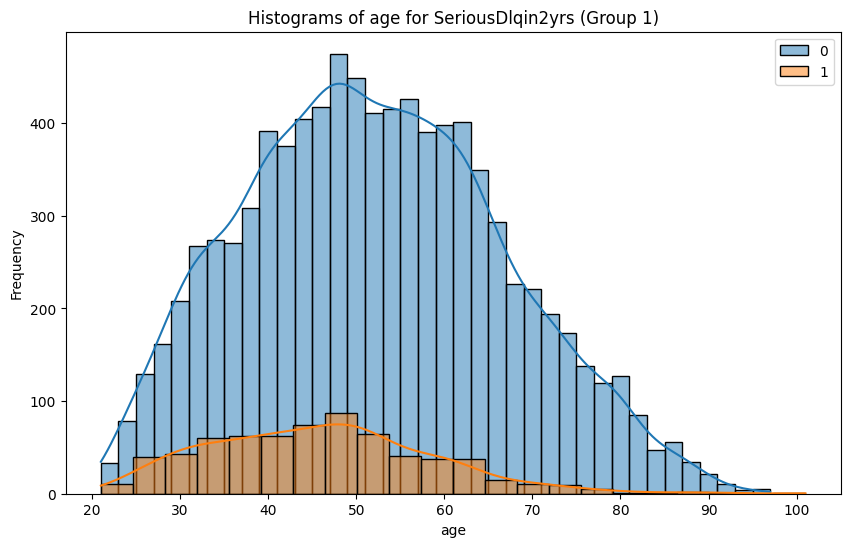

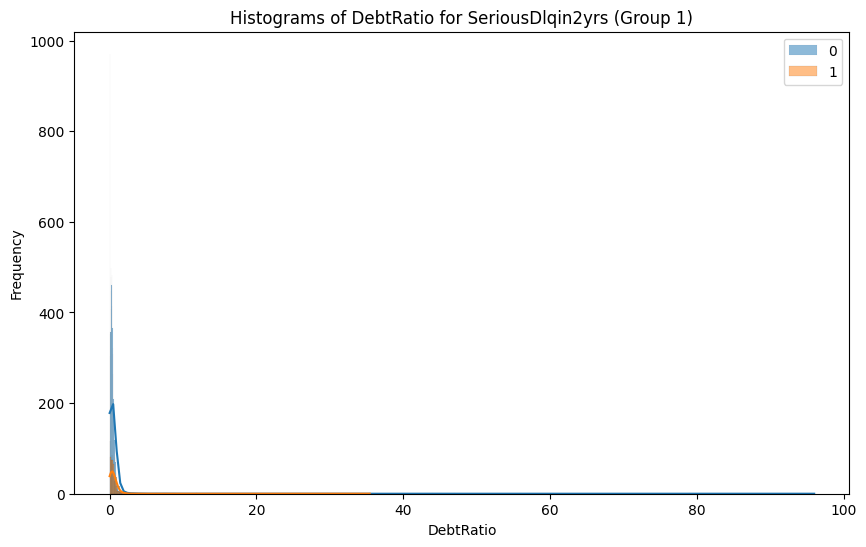

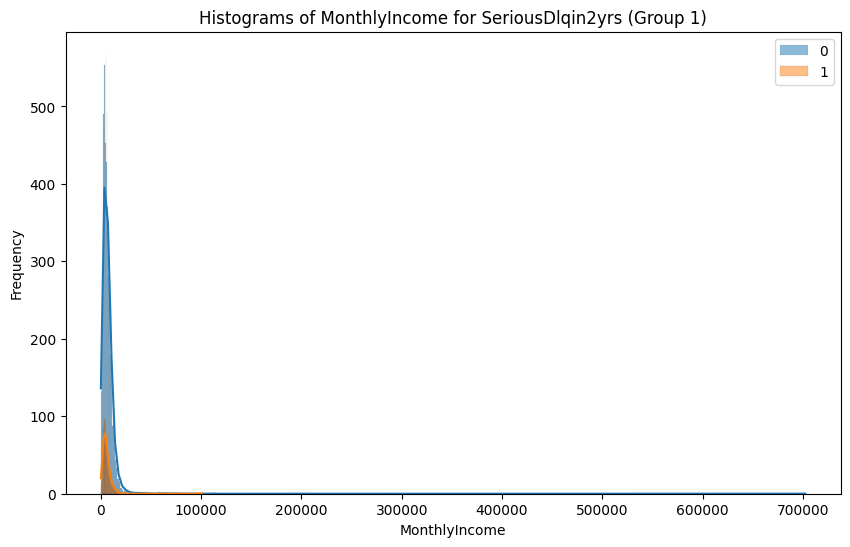

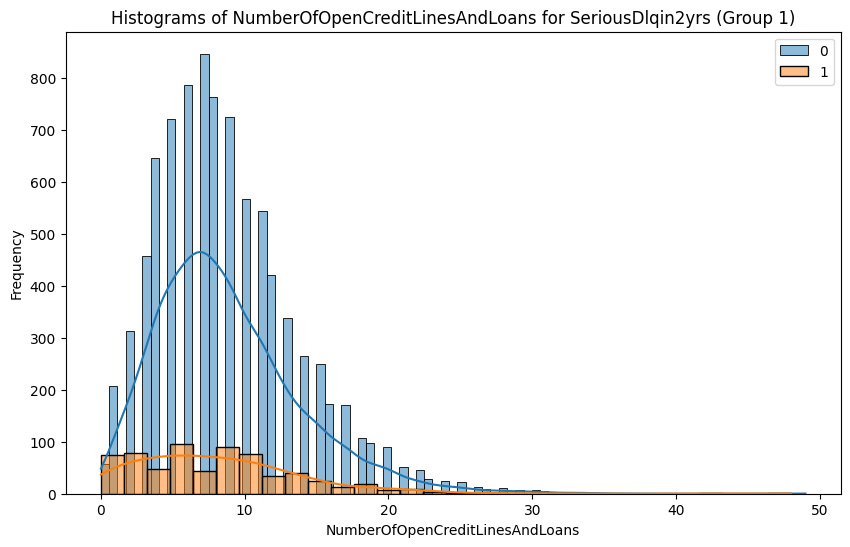

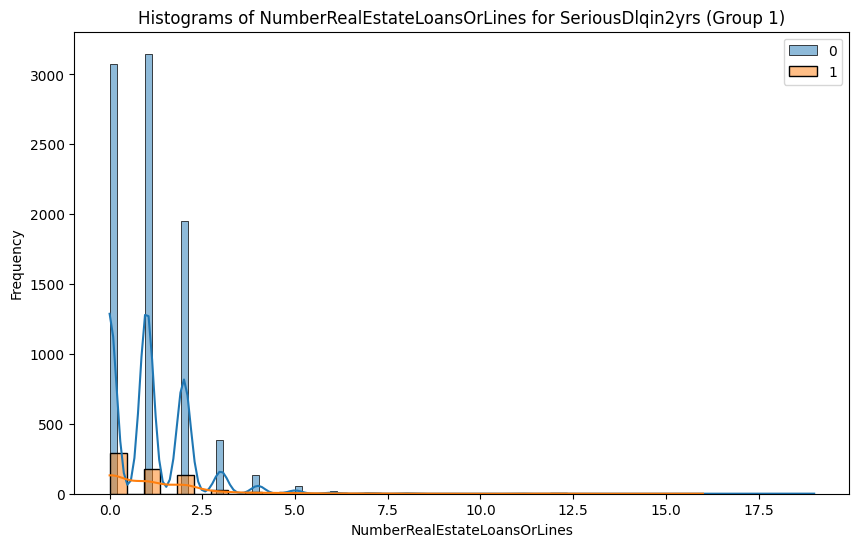

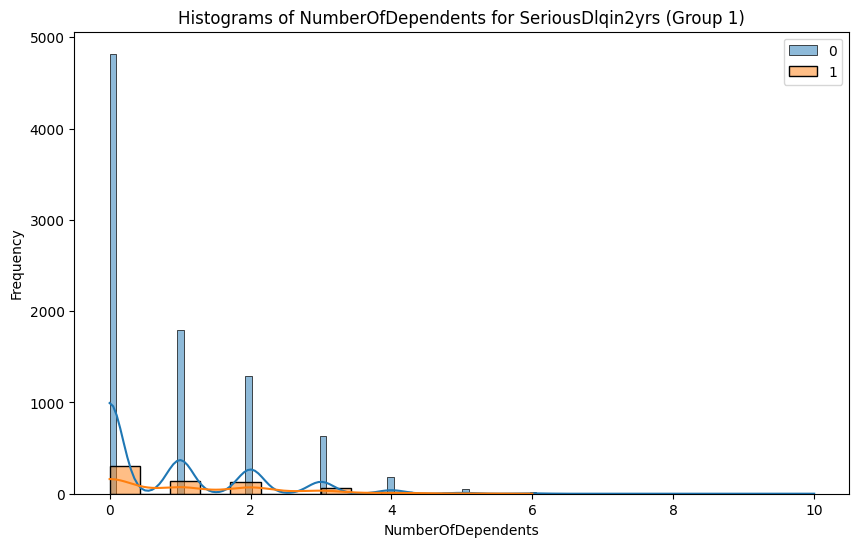

In [19]:
for valor in feat_num:
    bt.plot_grouped_histograms(train_set, target, valor, group_size=2)

Las unicas que veo que pudean discriminar con la target son RevolvingUtilizationOfUnsecuredLines y age. Las selecciono.

In [20]:
feat_visual = ['RevolvingUtilizationOfUnsecuredLines', 'age', "DebtRatio","MonthlyIncome"]

c:\Users\Usuario\Desktop\REPOS\DS_Online_Feb24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


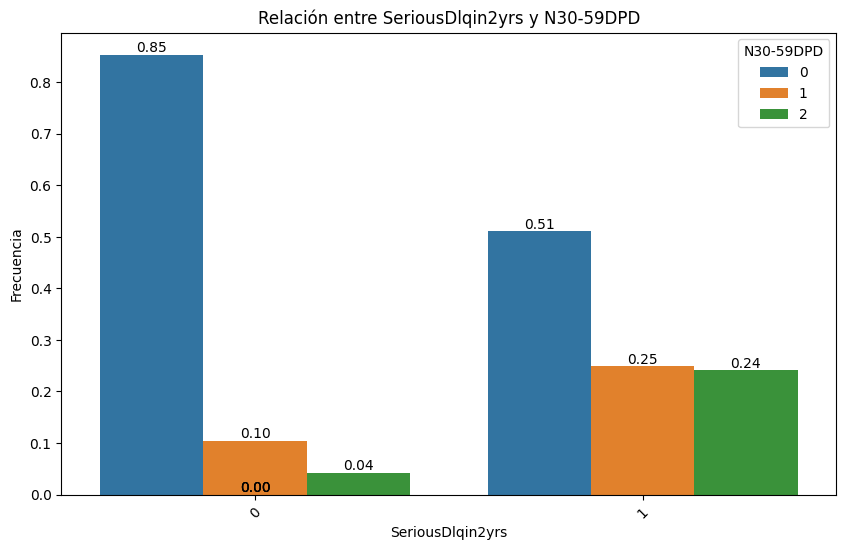

c:\Users\Usuario\Desktop\REPOS\DS_Online_Feb24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


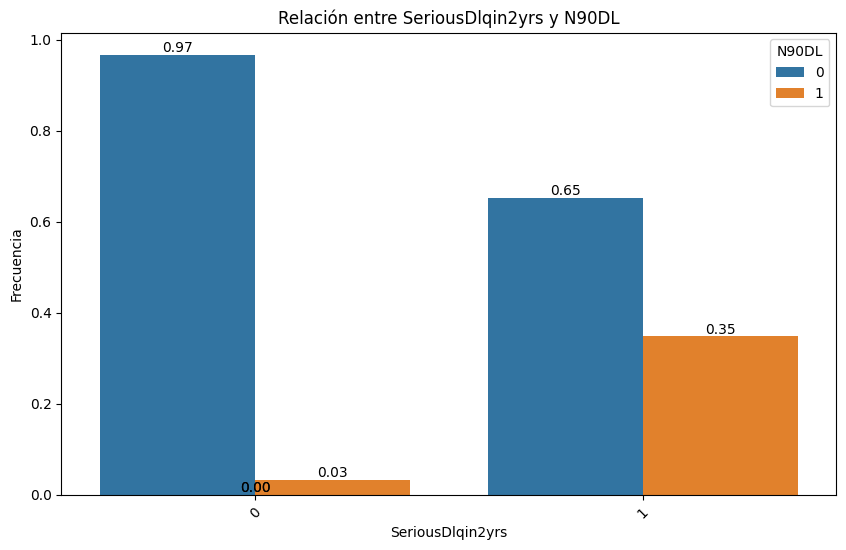

c:\Users\Usuario\Desktop\REPOS\DS_Online_Feb24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


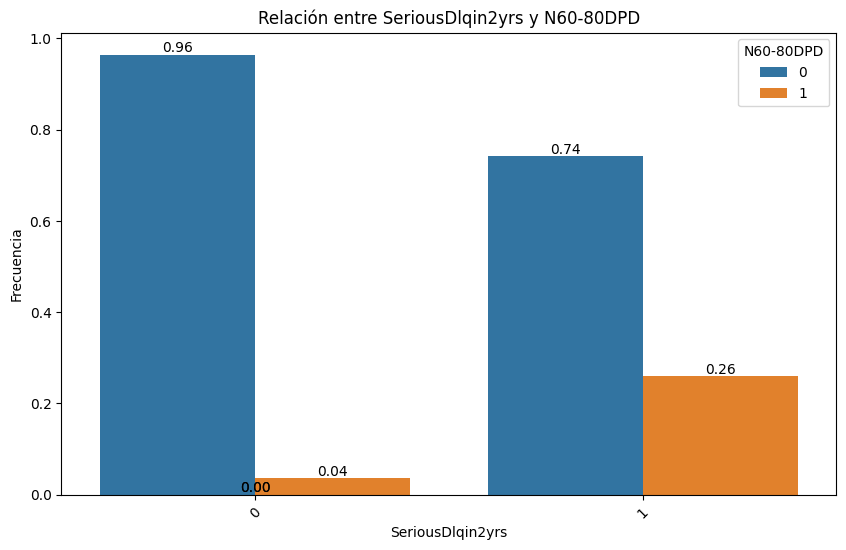

In [21]:
for col in feat_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq=True, show_values=True)

Las tres me parecen buenas. Las selecciono.

In [22]:
feat_visual += feat_cat

In [23]:
feat_visual

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'N30-59DPD',
 'N90DL',
 'N60-80DPD']

<Axes: >

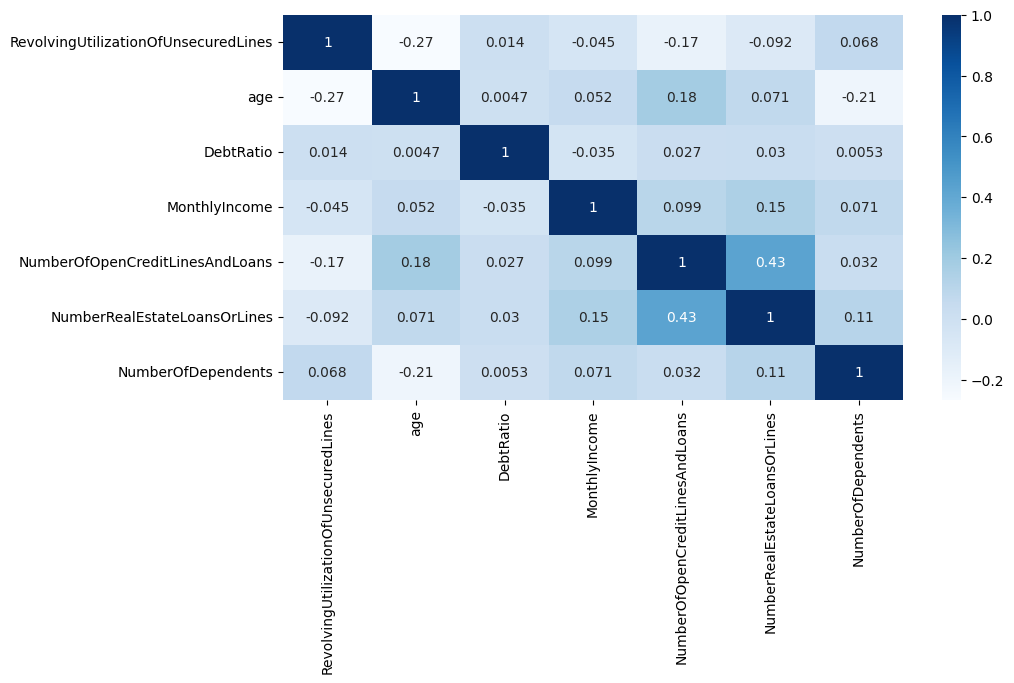

In [24]:
corr= train_set[feat_num].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot= True, cmap= "Blues")

No hay correlaciones preocupantes entre las numéricas

In [25]:
umbral_varianza = 0.5

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(train_set[feat_visual])
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

Lista seleccionada para selector de Varianza ['age' 'DebtRatio' 'MonthlyIncome']


2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [26]:
col_out = feat_dis+[target]

In [27]:
X_train = train_set.drop(columns=col_out)
y_train = train_set[target]
X_test = test_set.drop(columns=col_out)
y_test = test_set[target]

In [28]:
'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930,
constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre
la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de
dos o más grupos.
'''

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train[feat_num], y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,0.039187,61.0,3073.0,7.0,0.0
1,0.919317,41.0,3945.0,3.0,0.0
2,0.253718,49.0,13250.0,19.0,0.0
3,0.249462,26.0,764.0,4.0,0.0
4,0.224520,76.0,3150.0,6.0,0.0
...,...,...,...,...,...
9447,0.174437,61.0,7203.0,7.0,0.0
9448,0.039651,64.0,15667.0,6.0,0.0
9449,1.000000,29.0,2040.0,0.0,6.0
9450,0.945805,51.0,4500.0,16.0,0.0


In [29]:

for col in feat_cat:
    print(f"MI({col};{target}):", mutual_info_score(X_train[col], y_train))

MI(N30-59DPD;SeriousDlqin2yrs): 0.023411961613871907
MI(N90DL;SeriousDlqin2yrs): 0.03315981105348048
MI(N60-80DPD;SeriousDlqin2yrs): 0.019220687427717945


In [30]:
feat_ANOVA = selector.get_feature_names_out().tolist()
feat_ANOVA

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

Ninguna de las categoricas parece ser buena dan unos valores muy proximos a 0

3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [31]:
rf_selector = RandomForestClassifier(max_depth=5, random_state= 42, class_weight = "balanced")
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 max_depth=5, random_state=42),
                threshold='median')

In [32]:
feat_SFM = selector.get_feature_names_out().tolist()
feat_SFM

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

4. Selección de las mejores features empleando RFE.

In [33]:
rf_RFE = RandomForestClassifier(max_depth=5, random_state= 42)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, random_state=42),
    n_features_to_select=5)

In [34]:
feat_RFE = selector_model.get_feature_names_out().tolist()
feat_RFE

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N30-59DPD',
 'N90DL',
 'N60-80DPD']

5. Selección de las mejores features empleando SFS. 

In [35]:
rf_SFS = RandomForestClassifier(max_depth=5, random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [36]:
feat_SFS = selector_model.get_feature_names_out().tolist()
feat_SFS

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N30-59DPD',
 'N90DL',
 'N60-80DPD']

6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [37]:
feat_TOTAL = feat_visual + feat_ANOVA + feat_RFE + feat_SFM + feat_SFS

In [38]:
votacion = {'DebtRatio' : 0,
            'MonthlyIncome' :0 ,
            'N30-59DPD' : 0,
            'N60-80DPD' : 0,
            'N90DL' : 0,
            'NumberOfDependents' : 0,
            'NumberOfOpenCreditLinesAndLoans' : 0,
            'RevolvingUtilizationOfUnsecuredLines' : 0,
            'age' : 0
            }

for i in feat_TOTAL:
    votacion[i] += 1

votacion    


{'DebtRatio': 1,
 'MonthlyIncome': 3,
 'N30-59DPD': 3,
 'N60-80DPD': 3,
 'N90DL': 3,
 'NumberOfDependents': 2,
 'NumberOfOpenCreditLinesAndLoans': 2,
 'RevolvingUtilizationOfUnsecuredLines': 5,
 'age': 5}

In [39]:
feat_hvot = ['MonthlyIncome', 'N30-59DPD', 'N60-80DPD', 'N90DL', 'NumberOfOpenCreditLinesAndLoans', 'RevolvingUtilizationOfUnsecuredLines', 'age']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [40]:
feat_dic = {"Visual" : feat_visual, "ANOVA" : feat_ANOVA, "SFS": feat_SFS, "SFM": feat_SFM, "RFE": feat_RFE, "Votacion" : feat_hvot}

In [54]:
model_names = ["Regresion Logistica","Random Forest", "LightGBM"]

lr_clf = LogisticRegression(class_weight= "balanced", max_iter = 10000)
rf_clf = RandomForestClassifier(class_weight= "balanced",max_depth=5, random_state= 42)
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state= 42, verbose = -100)

model_set = [lr_clf, rf_clf, lgb_clf ]

In [55]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    for clave, valor in feat_dic.items():
        print(f"Para {nombre} y features set {clave}:", end = " ")
        metrica = cross_val_score(modelo, X_train[valor], y_train, cv = 5, scoring = "balanced_accuracy")
        print(np.mean(metrica))
        combi = nombre + "_" + clave
        #print(combi)
        metricas_cv[combi] = metrica
        valores.append(np.mean(metricas_cv[combi]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print()
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para Regresion Logistica y features set Visual: 0.7625731419105793
Para Regresion Logistica y features set ANOVA: 0.7321749384915079
Para Regresion Logistica y features set SFS: 0.7614799005330645
Para Regresion Logistica y features set SFM: 0.7321749384915079
Para Regresion Logistica y features set RFE: 0.7614799005330645
Para Regresion Logistica y features set Votacion: 0.7701650284947597
Para Random Forest y features set Visual: 0.7584715731363557
Para Random Forest y features set ANOVA: 0.7250424463732719
Para Random Forest y features set SFS: 0.7579461894981566
Para Random Forest y features set SFM: 0.7250424463732719
Para Random Forest y features set RFE: 0.7579461894981566
Para Random Forest y features set Votacion: 0.7598396770753867
Para LightGBM y features set Visual: 0.7212281239736533
Para LightGBM y features set ANOVA: 0.6894215909483203
Para LightGBM y features set SFS: 0.7341116732965183
Para LightGBM y features set SFM: 0.6894215909483203
Para LightGBM y features set RF

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [43]:
param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100)
lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgb_grid.fit(X_train[feat_SFS],y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100),
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [44]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [45]:
y_pred = lgb_grid.best_estimator_.predict(X_test[feat_SFS])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2198
           1       0.22      0.72      0.33       166

    accuracy                           0.80      2364
   macro avg       0.60      0.76      0.61      2364
weighted avg       0.92      0.80      0.84      2364



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [46]:
pca = PCA()
pca.fit(X_train, y_train)

PCA()

In [47]:
pca.explained_variance_ratio_

array([9.99998475e-01, 1.30784529e-06, 1.54849288e-07, 4.49995855e-08,
       8.02487878e-09, 6.18105287e-09, 1.88837422e-09, 6.87594084e-10,
       3.09731290e-10, 2.15337899e-10])

In [48]:
pca.explained_variance_ratio_.cumsum()

array([0.99999847, 0.99999978, 0.99999994, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [49]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
lgb_clf_pca = LGBMClassifier(**lgb_grid.best_params_, verbose = -100)

In [50]:
lgb_clf_pca.fit(X_train_pca[:,:1], y_train)
y_pred = lgb_clf_pca.predict(X_test_pca[:,:1])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69      2198
           1       0.08      0.51      0.14       166

    accuracy                           0.54      2364
   macro avg       0.51      0.53      0.41      2364
weighted avg       0.88      0.54      0.65      2364



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:696: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:696: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
